# Measuring the Economic Impact of International Sanctions on Civilian Well-Being

**Milestone 1 – Problem Formulation, Data Acquisition, and Data Exploration**

Author: Eshwar Akki, Vardhan
Course: CAP5771  
Date: February 2026


## 1. Importing Analytical and Database Libraries

This section imports the core Python libraries required for data processing, database management, and visualization.

- `pandas` and `numpy` are used for structured data manipulation and numerical computation.
- `sqlite3` enables relational database creation and SQL-based querying.
- `matplotlib` and `seaborn` support exploratory data visualization.
- `os` ensures controlled file path management.

These libraries collectively establish the technical framework for reproducible empirical analysis.


In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Database
import sqlite3
import os

## 2. Configuring the Working Environment

The working directory is defined to ensure accurate dataset access and project reproducibility.

This step enforces:
- Structured file organization
- Consistent data loading
- Transparent workflow management


In [2]:
import os

os.chdir(r"C:\Users\pc\ids project\Measuring-the-Economic-Impact-of-International-Sanctions-on-Civilian-Well-Being-main")

print("Now inside:", os.getcwd())


Now inside: C:\Users\pc\ids project\Measuring-the-Economic-Impact-of-International-Sanctions-on-Civilian-Well-Being-main


## 3. Construction of Relational Database

A SQLite database (`milestone1.db`) is initialized to store all datasets in a structured relational format.

The database serves three primary purposes:

1. Centralized data storage
2. Structured query capability via SQL
3. Scalability for future integration and modeling

This design reflects standard data engineering practices used in empirical research.


In [3]:
import sqlite3

conn = sqlite3.connect("milestone1.db")

print("Database created successfully.")


Database created successfully.


## 2. Data Acquisition

Four datasets are imported:

1. **World Development Indicators (WDI)** – Macroeconomic and social indicators  
2. **Sanctions Dataset** – Information on international sanctions episodes  
3. **Trade Dataset** – Trade flow statistics  
4. **Political Dataset** – Regime characteristics and conflict measures  

These datasets collectively support cross-domain analysis of the economic and political consequences of sanctions at the country-year level.


In [4]:
wdi = pd.read_csv("data/raw/wdi.csv")
sanctions = pd.read_csv("data/raw/sanctions.csv")
trade = pd.read_csv("data/raw/trade.csv")
political = pd.read_csv("data/raw/political.csv")


## 3. Database Population

Each dataset is written into the SQLite database as an independent table.

This step ensures:

- Structured relational storage  
- Clean thematic separation of datasets  
- Compatibility with SQL joins for integration  

The architecture supports country-year level merging across economic, trade, sanctions, and political domains.


In [5]:
wdi.to_sql("wdi", conn, if_exists="replace", index=False)
sanctions.to_sql("sanctions", conn, if_exists="replace", index=False)
trade.to_sql("trade", conn, if_exists="replace", index=False)
political.to_sql("political", conn, if_exists="replace", index=False)

print("All tables successfully stored in database.")


All tables successfully stored in database.


## 4. Database Verification

A SQL query is executed to confirm successful table creation.
- Structural integrity of the database  
- Proper persistence of all datasets  
- Readiness for analytical querying  


In [6]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
print(pd.read_sql(query, conn))


        name
0        wdi
1  sanctions
2      trade
3  political


## 5. Closing Database Connection

The database connection is formally closed to ensure proper resource management and adherence to database handling best practices.


In [7]:
conn.close()
print("Database connection closed.")


Database connection closed.


## 6. Environment Configuration

- Expanding visible columns  
- Standardizing visualization style  
- Confirming working directory for reproducibility  


In [8]:


# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

print("Working Directory:", os.getcwd())


Working Directory: C:\Users\pc\ids project\Measuring-the-Economic-Impact-of-International-Sanctions-on-Civilian-Well-Being-main


## 7. Dataset Dimensional Overview

The datasets are reloaded for exploratory analysis.
- Number of observations  
- Number of variables  
- Structural comparability across datasets  


In [9]:
# Load datasets
wdi = pd.read_csv("data/raw/wdi.csv")
sanctions = pd.read_csv("data/raw/sanctions.csv")
trade = pd.read_csv("data/raw/trade.csv")
political = pd.read_csv("data/raw/political.csv")

print("WDI shape:", wdi.shape)
print("Sanctions shape:", sanctions.shape)
print("Trade shape:", trade.shape)
print("Political shape:", political.shape)


WDI shape: (7820, 13)
Sanctions shape: (7820, 17)
Trade shape: (4956, 5)
Political shape: (5335, 6)


## 8. Preliminary Data Inspection

We inspect the first few observations of each dataset to:

- Understand variable structure  
- Identify naming conventions  
- Detect early inconsistencies or missing values  

This initial inspection supports structured data cleaning and harmonization.


In [10]:
# Preview datasets
print("WDI preview")
display(wdi.head())

print("Sanctions preview")
display(sanctions.head())

print("Trade preview")
display(trade.head())

print("Political preview")
display(political.head())


WDI preview


,country,year,inflation_rate,gdp_growth,school_enrollment,SE.PRM.NENR.FE,SE.PRM.NENR.MA,child_mortality_u5,SH.DYN.MORT.FE,SH.DYN.MORT.MA,poverty_rate,gini_index,unemployment_rate
0,ABW,1995,3.361391,2.547144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,1996,3.225288,1.185789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,1997,2.999948,7.046875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,1998,1.869489,1.991984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,1999,2.280372,1.238042,97.82877,98.47424,97.20058,NaN,NaN,NaN,NaN,NaN,NaN


Sanctions preview


,country,year,inflation_rate,gdp_growth,school_enrollment,SE.PRM.NENR.FE,SE.PRM.NENR.MA,child_mortality_u5,SH.DYN.MORT.FE,SH.DYN.MORT.MA,poverty_rate,gini_index,unemployment_rate,sanction_active,sanction_type,sanction_duration,sanction_intensity_index
0,ABW,1995,3.361391,2.547144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,none,0.0,0.0
1,ABW,1996,3.225288,1.185789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,none,0.0,0.0
2,ABW,1997,2.999948,7.046875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,none,0.0,0.0
3,ABW,1998,1.869489,1.991984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,none,0.0,0.0
4,ABW,1999,2.280372,1.238042,97.82877,98.47424,97.20058,NaN,NaN,NaN,NaN,NaN,NaN,0.0,none,0.0,0.0


Trade preview


,country,year,oil_exports,pharma_imports,fuel_imports
0,Afghanistan,2008,0.0,19670526.0,4.875765e+08
1,Afghanistan,2009,393708.0,16634367.0,7.882296e+08
2,Afghanistan,2010,0.0,40688984.0,1.075187e+09
3,Afghanistan,2011,2391280.0,43884154.0,2.222109e+09
4,Afghanistan,2012,0.0,36018405.0,1.517526e+09


Political preview


,country,country_text_id,year,regime_score,conflict_incidence,conflict_intensity
0,Mexico,MEX,1995,0.480,0.0,0.0
1,Mexico,MEX,1996,0.508,1.0,1.0
2,Mexico,MEX,1997,0.556,0.0,0.0
3,Mexico,MEX,1998,0.598,0.0,0.0
4,Mexico,MEX,1999,0.602,0.0,0.0


In [11]:
# Check missing values
print("Missing values (WDI):")
print(wdi.isna().sum().sort_values(ascending=False))

print("\nMissing values (Sanctions):")
print(sanctions.isna().sum().sort_values(ascending=False))


Missing values (WDI):
gini_index            5761
poverty_rate          5349
SE.PRM.NENR.FE        4940
SE.PRM.NENR.MA        4940
school_enrollment     4067
inflation_rate        1080
unemployment_rate      779
child_mortality_u5     744
SH.DYN.MORT.FE         744
SH.DYN.MORT.MA         744
gdp_growth             232
country                  0
year                     0
dtype: int64

Missing values (Sanctions):
gini_index                  5761
poverty_rate                5349
SE.PRM.NENR.FE              4940
SE.PRM.NENR.MA              4940
school_enrollment           4067
inflation_rate              1080
unemployment_rate            779
SH.DYN.MORT.FE               744
child_mortality_u5           744
SH.DYN.MORT.MA               744
gdp_growth                   232
sanction_type                  0
sanction_duration              0
country                        0
sanction_active                0
year                           0
sanction_intensity_index       0
dtype: int64


In [12]:
# Descriptive statistics for economic indicators
economic_cols = [
    "gdp_growth",
    "inflation_rate",
    "unemployment_rate",
    "poverty_rate",
    "gini_index",
    "child_mortality_u5",
    "school_enrollment"
]

wdi[economic_cols].describe()


,gdp_growth,inflation_rate,unemployment_rate,poverty_rate,gini_index,child_mortality_u5,school_enrollment
count,7588.000000,6740.000000,7041.000000,2471.000000,2059.000000,7076.000000,3753.000000
mean,3.555372,8.740261,7.809459,12.803723,37.158524,43.850161,87.719786
std,5.886456,65.959622,5.517708,19.167339,8.405845,46.020222,12.901664
min,-54.402093,-16.859691,0.100000,0.000000,23.000000,1.400000,21.946710
25%,1.588251,1.991836,4.114794,0.450000,30.800000,10.400000,85.216090
50%,3.703397,3.823927,6.290000,2.800000,35.200000,25.200000,92.413410
75%,5.798860,7.102209,10.020000,18.250000,42.200000,63.800000,95.852510
max,149.972963,4145.105982,38.800000,94.900000,65.800000,478.900000,100.000000


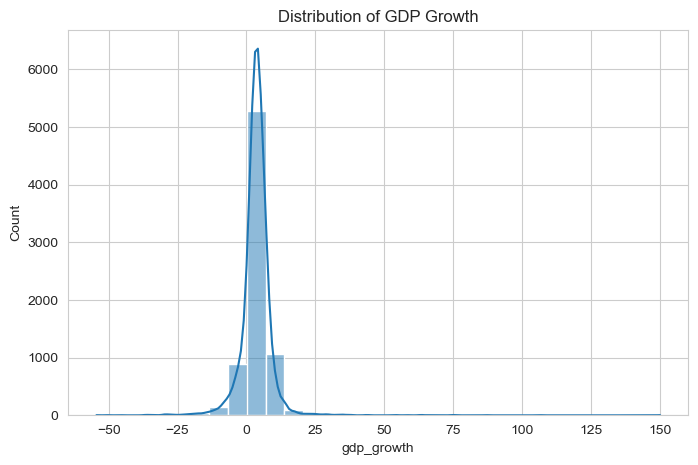

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(wdi["gdp_growth"], bins=30, kde=True)
plt.title("Distribution of GDP Growth")
plt.show()


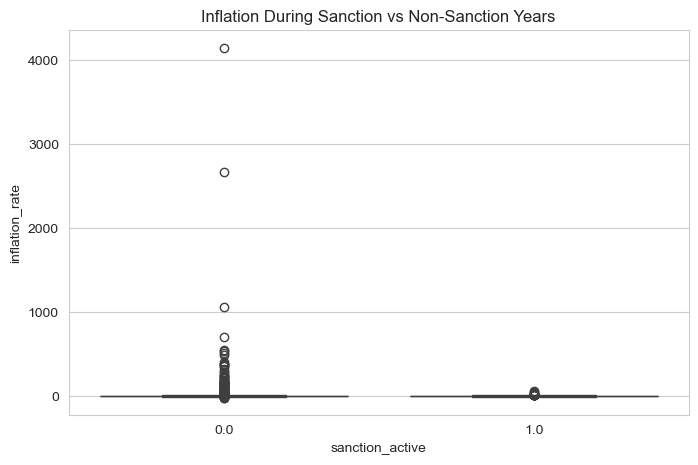

In [14]:
merged = wdi.merge(
    sanctions[["country","year","sanction_active"]],
    on=["country","year"],
    how="left"
)

plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="sanction_active", y="inflation_rate")
plt.title("Inflation During Sanction vs Non-Sanction Years")
plt.show()


In [15]:
# Create SQLite database
conn = sqlite3.connect("sanctions_project.db")

# Save tables to database
wdi.to_sql("wdi", conn, if_exists="replace", index=False)
sanctions.to_sql("sanctions", conn, if_exists="replace", index=False)
trade.to_sql("trade", conn, if_exists="replace", index=False)
political.to_sql("political", conn, if_exists="replace", index=False)

print("Database created successfully.")


Database created successfully.


In [16]:
# Check tables inside database
query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql(query, conn)


,name
0,wdi
1,sanctions
2,trade
3,political


In [17]:
query = """
SELECT w.country, w.year, w.gdp_growth, s.sanction_active
FROM wdi w
LEFT JOIN sanctions s
ON w.country = s.country
AND w.year = s.year
LIMIT 10;
"""

pd.read_sql(query, conn)


,country,year,gdp_growth,sanction_active
0,ABW,1995,2.547144,0.0
1,ABW,1996,1.185789,0.0
2,ABW,1997,7.046875,0.0
3,ABW,1998,1.991984,0.0
4,ABW,1999,1.238042,0.0
5,ABW,2000,7.622921,0.0
6,ABW,2001,4.182002,0.0
7,ABW,2002,-0.944953,0.0
8,ABW,2003,1.110505,0.0
9,ABW,2004,7.293728,0.0


In [18]:
# Percentage missing
missing_percent = (wdi.isna().mean() * 100).sort_values(ascending=False)
missing_percent


gini_index            73.670077
poverty_rate          68.401535
SE.PRM.NENR.FE        63.171355
SE.PRM.NENR.MA        63.171355
school_enrollment     52.007673
inflation_rate        13.810742
unemployment_rate      9.961637
child_mortality_u5     9.514066
SH.DYN.MORT.FE         9.514066
SH.DYN.MORT.MA         9.514066
gdp_growth             2.966752
country                0.000000
year                   0.000000
dtype: float64

In [19]:
# Missing values summary
missing_summary = wdi.isna().sum().sort_values(ascending=False)
missing_summary


gini_index            5761
poverty_rate          5349
SE.PRM.NENR.FE        4940
SE.PRM.NENR.MA        4940
school_enrollment     4067
inflation_rate        1080
unemployment_rate      779
child_mortality_u5     744
SH.DYN.MORT.FE         744
SH.DYN.MORT.MA         744
gdp_growth             232
country                  0
year                     0
dtype: int64

In [20]:
wdi.describe()


,year,inflation_rate,gdp_growth,school_enrollment,SE.PRM.NENR.FE,SE.PRM.NENR.MA,child_mortality_u5,SH.DYN.MORT.FE,SH.DYN.MORT.MA,poverty_rate,gini_index,unemployment_rate
count,7820.000000,6740.000000,7588.000000,3753.000000,2880.000000,2880.000000,7076.000000,7076.000000,7076.000000,2471.000000,2059.000000,7041.000000
mean,2009.551790,8.740261,3.555372,87.719786,84.447186,86.522097,43.850161,40.811004,46.734646,12.803723,37.158524,7.809459
std,8.630216,65.959622,5.886456,12.901664,15.087001,12.471544,46.020222,43.837439,48.141399,19.167339,8.405845,5.517708
min,1995.000000,-16.859691,-54.402093,21.946710,17.274080,26.530650,1.400000,1.300000,1.500000,0.000000,23.000000,0.100000
25%,2002.000000,1.991836,1.588251,85.216090,80.554647,83.332683,10.400000,9.325260,11.400000,0.450000,30.800000,4.114794
50%,2010.000000,3.823927,3.703397,92.413410,89.688590,90.689250,25.200000,22.807043,27.502655,2.800000,35.200000,6.290000
75%,2017.000000,7.102209,5.798860,95.852510,94.643413,95.014000,63.800000,59.125000,68.225000,18.250000,42.200000,10.020000
max,2024.000000,4145.105982,149.972963,100.000000,99.989950,99.991820,478.900000,471.900000,485.700000,94.900000,65.800000,38.800000


In [21]:
wdi[["gdp_growth","inflation_rate","unemployment_rate"]].describe()


,gdp_growth,inflation_rate,unemployment_rate
count,7588.000000,6740.000000,7041.000000
mean,3.555372,8.740261,7.809459
std,5.886456,65.959622,5.517708
min,-54.402093,-16.859691,0.100000
25%,1.588251,1.991836,4.114794
50%,3.703397,3.823927,6.290000
75%,5.798860,7.102209,10.020000
max,149.972963,4145.105982,38.800000


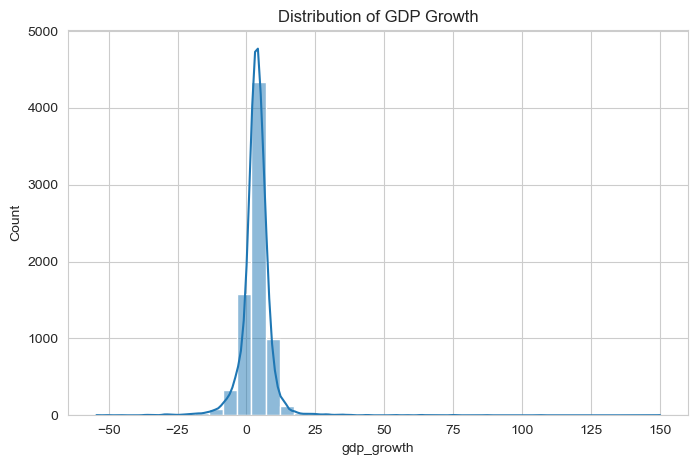

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(wdi["gdp_growth"], bins=40, kde=True)
plt.title("Distribution of GDP Growth")
plt.show()


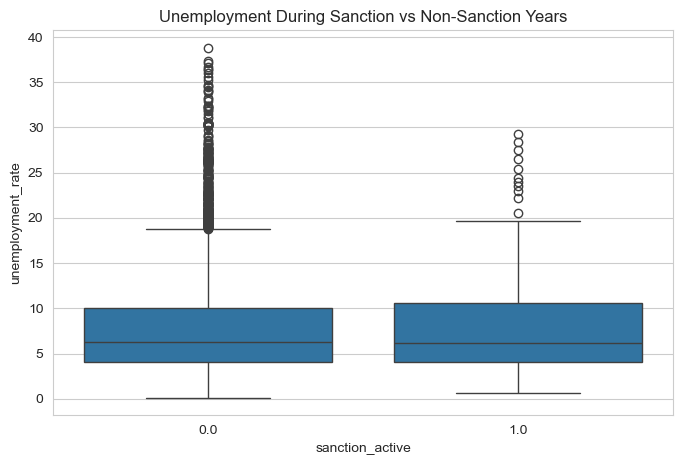

In [23]:
merged2 = wdi.merge(
    sanctions[["country","year","sanction_active"]],
    on=["country","year"],
    how="left"
)

plt.figure(figsize=(8,5))
sns.boxplot(data=merged2, x="sanction_active", y="unemployment_rate")
plt.title("Unemployment During Sanction vs Non-Sanction Years")
plt.show()


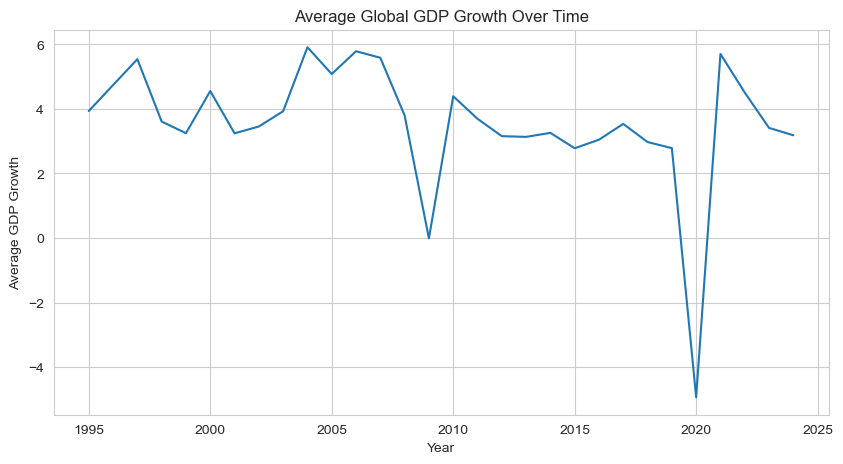

In [24]:
avg_gdp = wdi.groupby("year")["gdp_growth"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_gdp.index, avg_gdp.values)
plt.title("Average Global GDP Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Average GDP Growth")
plt.show()
